In [6]:
import os

image_dir = 'images/images'
label_dir = 'label/label'

images = set(os.listdir(image_dir))
labels = set(os.listdir(label_dir))

image_files = [f for f in os.listdir(image_dir) if f.endswith('.tif')]
label_files = [f for f in os.listdir(label_dir) if f.endswith('_label.tif')]

# Remove the "_label" suffix to compare
label_files_cleaned = [f.replace('_label', '') for f in label_files]

# Find images without corresponding labels
missing_labels = [img for img in image_files if img not in label_files_cleaned]

if missing_labels:
    print("The following images are missing labels:")
    for img in missing_labels:
        print(img)
else:
    print("All images have corresponding labels.")


The following images are missing labels:
tile2_8000_5600(1).tif
tile2_8000_6800(1).tif
tile2_8000_7600(1).tif
tile2_8000_6400(1).tif
tile2_8000_7200(1).tif
tile2_8000_4400(1).tif
tile2_8000_6000(1).tif
tile2_8000_5200(1).tif
tile2_8000_4800(1).tif


In [7]:
! ls label/label | grep tile2_8000_5600

tile2_8000_5600_label.tif


In [8]:
! ls images/images/ | grep tile2_8000_5600

tile2_8000_5600(1).tif
tile2_8000_5600.tif


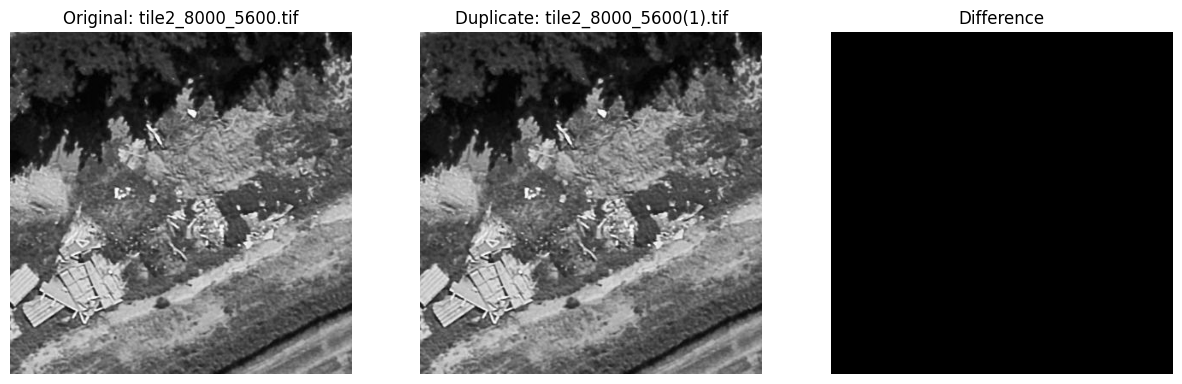

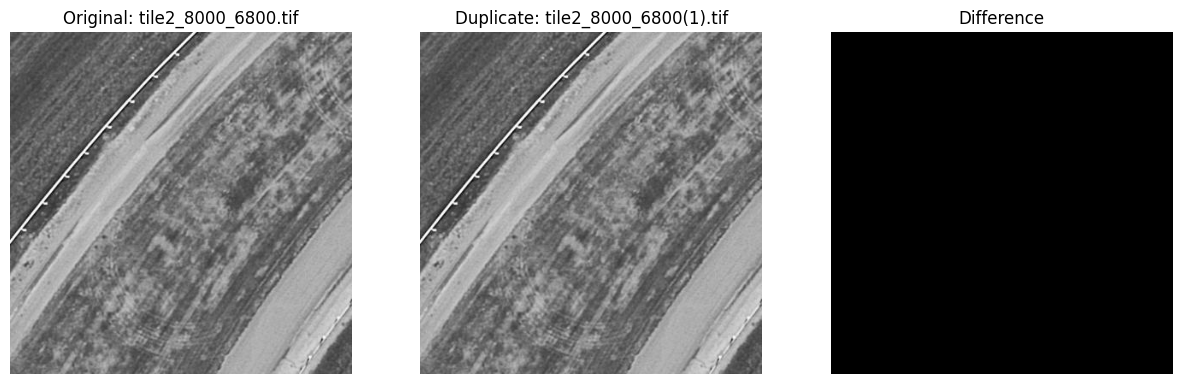

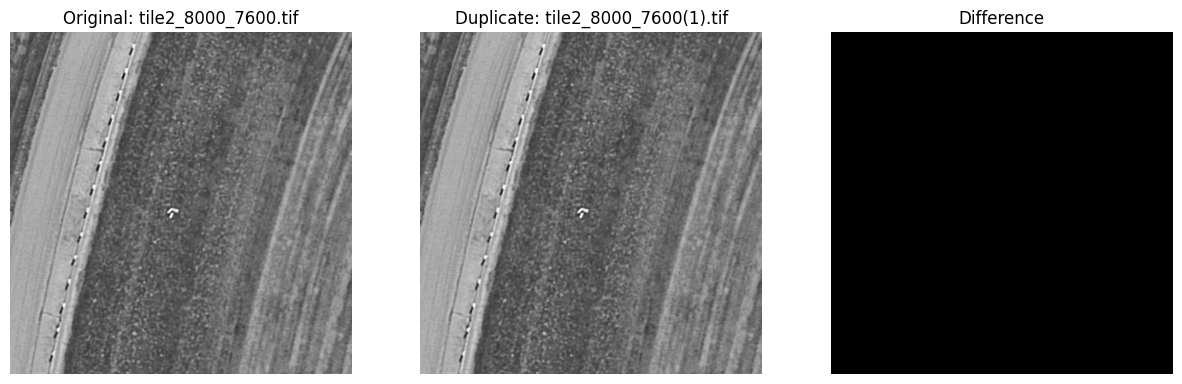

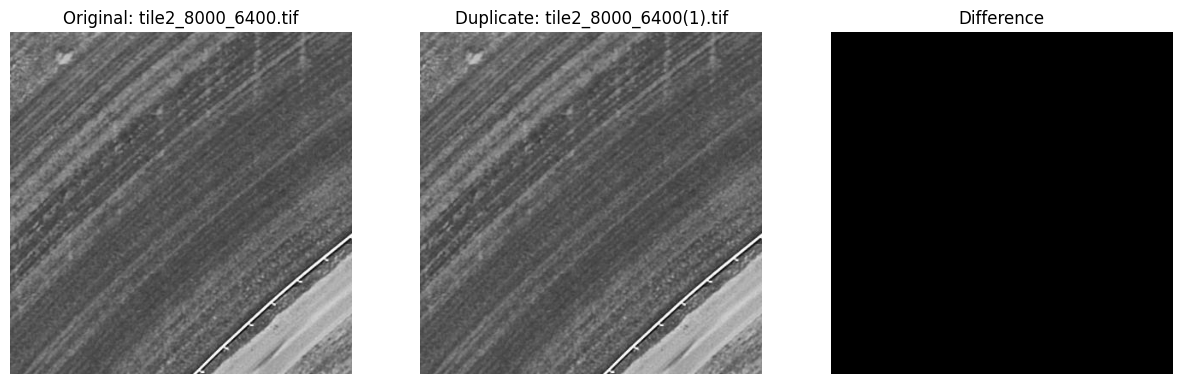

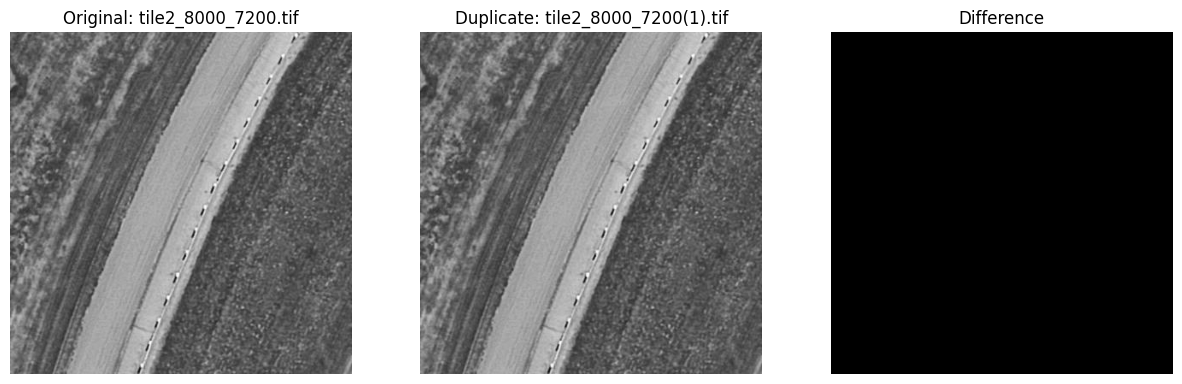

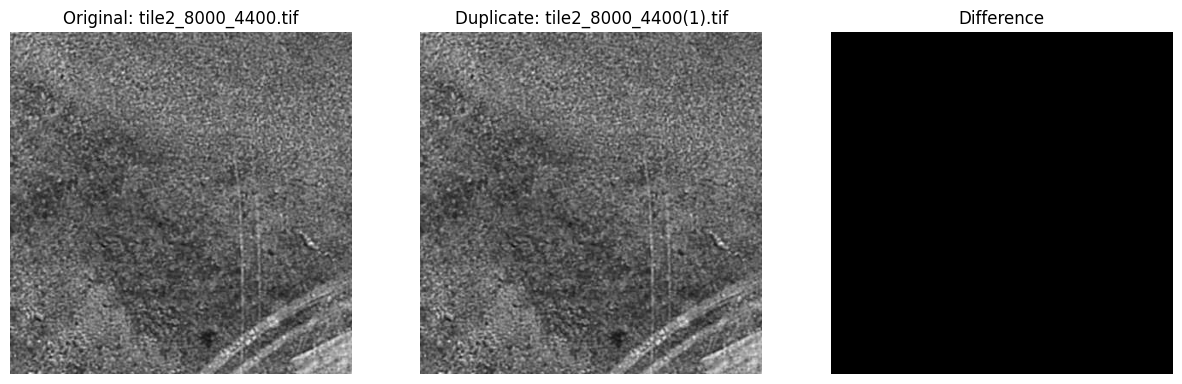

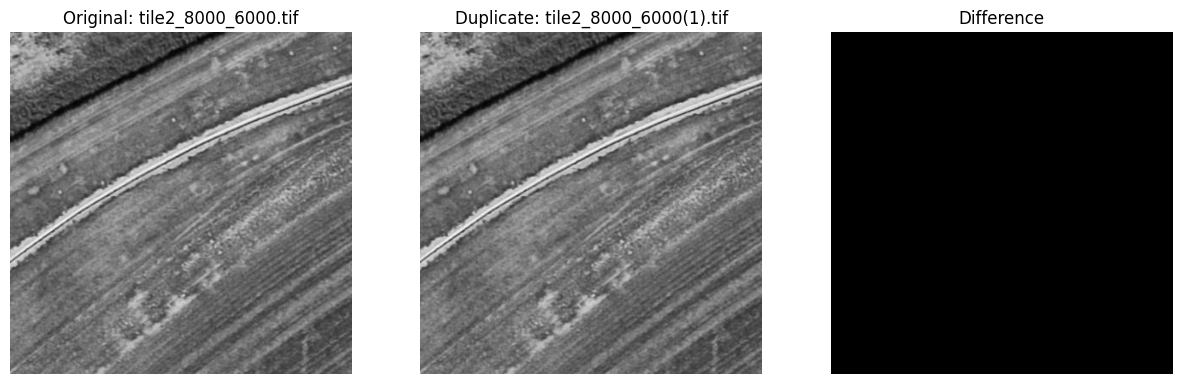

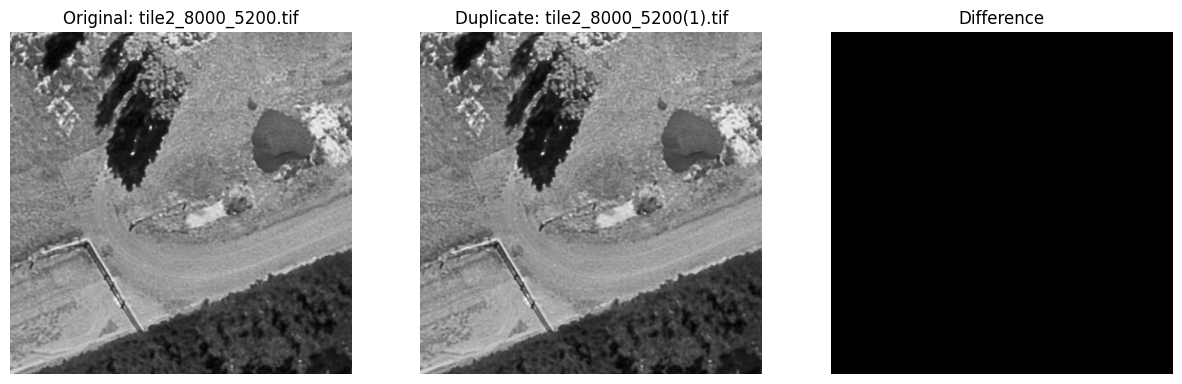

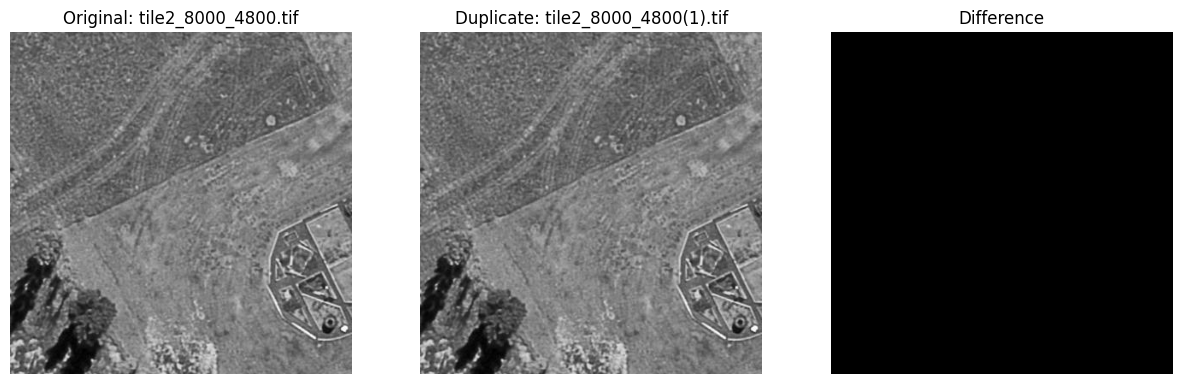

In [10]:
import os
from PIL import ImageChops, Image
import matplotlib.pyplot as plt

# Set the path for the images directory
image_dir = 'images/images'

# List of image pairs (original and duplicate)
image_files = [f for f in os.listdir(image_dir) if f.endswith('(1).tif')]

# Compare each image pair
for image_file in image_files:
    # Corresponding original file
    original_file = image_file.replace('(1)', '')
    
    # Full paths for both images
    duplicate_path = os.path.join(image_dir, image_file)
    original_path = os.path.join(image_dir, original_file)
    
    # Open images
    duplicate_img = Image.open(duplicate_path).convert('L')  # Convert to grayscale
    original_img = Image.open(original_path).convert('L')  # Convert to grayscale
    
    # Find difference between the images
    diff_img = ImageChops.difference(duplicate_img, original_img)
    
    # Enhance the difference to make it more visible
    diff_img = diff_img.point(lambda x: x * 10)  # Amplify differences
    
    # Display the original, duplicate, and the difference
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(original_img, cmap='gray')
    axes[0].set_title(f'Original: {original_file}')
    axes[0].axis('off')
    
    axes[1].imshow(duplicate_img, cmap='gray')
    axes[1].set_title(f'Duplicate: {image_file}')
    axes[1].axis('off')
    
    axes[2].imshow(diff_img, cmap='gray')
    axes[2].set_title('Difference')
    axes[2].axis('off')
    
    plt.show()


In [11]:

# Set the path for the images directory
image_dir = 'images/images'

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('(1).tif')]

# Loop through and delete the duplicate files
for image_file in image_files:
    # Full path of the duplicate image
    file_path = os.path.join(image_dir, image_file)
    
    # Delete the file
    os.remove(file_path)
    print(f'Removed duplicate: {image_file}')

#len of image_files now
image_files = [f for f in os.listdir(image_dir)]
print(len(image_files))



Removed duplicate: tile2_8000_5600(1).tif
Removed duplicate: tile2_8000_6800(1).tif
Removed duplicate: tile2_8000_7600(1).tif
Removed duplicate: tile2_8000_6400(1).tif
Removed duplicate: tile2_8000_7200(1).tif
Removed duplicate: tile2_8000_4400(1).tif
Removed duplicate: tile2_8000_6000(1).tif
Removed duplicate: tile2_8000_5200(1).tif
Removed duplicate: tile2_8000_4800(1).tif
1671
